# SVD 3 (ricostruzione):

## Visualizzazione parametri:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

par= pd.read_csv('parametri_ottimizzati.csv', header=None, sep='\t', names=['parametro', 'valore'])
par.head()


,parametro,valore
0,Tm1,307.893541
1,Tm2,334.194405
2,dH1,-44657.509739
3,dH2,-16754.172263
4,C11,0.344965


Creazione dictionary di pandas con i parametri:

In [2]:
parametri_dict = pd.Series(par['valore'].values, index=par['parametro']).to_dict()
print(parametri_dict['Tm1'])

307.8935406785679


## Ricostruire gli spettri:

In questa sezione saranno ricostruiti gli spettri dei 3 stati:
- Folded: $$Spettro_{F}= C_{11} \cdot U_1 + C_{21} \cdot U_2 + C_{31} \cdot U_3$$
- Intermediate: $$Spettro_{I}= C_{21} \cdot U_1 + C_{22} \cdot U_2 + C_{32} \cdot U_3$$
- Unfolded: $$Spettro_{F}= C_{31} \cdot U_1 + C_{32} \cdot U_2 + C_{33} \cdot U_3$$

Per far ciò è necessario caricare il file delle componenti della svd U' (e per convenienza anche V').

In [3]:
# Carico U'
U_prime = pd.read_csv('U_prime.csv', sep='\t', header=None)
U_prime.head()

,0,1,2
0,2.844758,-1.468406,0.710050
1,2.830563,-1.468930,0.702890
2,2.818521,-1.495899,0.706873
3,2.816912,-1.504082,0.690331
4,2.827372,-1.500107,0.693214


In [4]:
# V'
V_prime = pd.read_csv('V_prime.csv', sep='\t', header=None)
V_prime.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.335387,0.332278,0.325200,0.313444,0.298559,0.278799,0.256337,0.227802,0.198460,0.172181,...,0.074353,0.074390,0.073713,0.074547,0.073541,0.072216,0.073334,0.075042,0.074320,0.075884
1,0.269200,0.255780,0.229317,0.205548,0.158639,0.110277,0.060324,-0.003506,-0.067997,-0.113391,...,-0.096379,-0.096222,-0.091988,-0.089686,-0.077678,-0.073245,-0.068366,-0.071350,-0.063233,-0.056212
2,0.020984,0.040300,0.017354,-0.007894,-0.025021,-0.053015,-0.081486,-0.142064,-0.152586,-0.167408,...,0.177551,0.190521,0.204641,0.207304,0.232782,0.266200,0.256349,0.289425,0.297496,0.316397


Ora ricostruisco gli spettri e li mostro in un grafico:

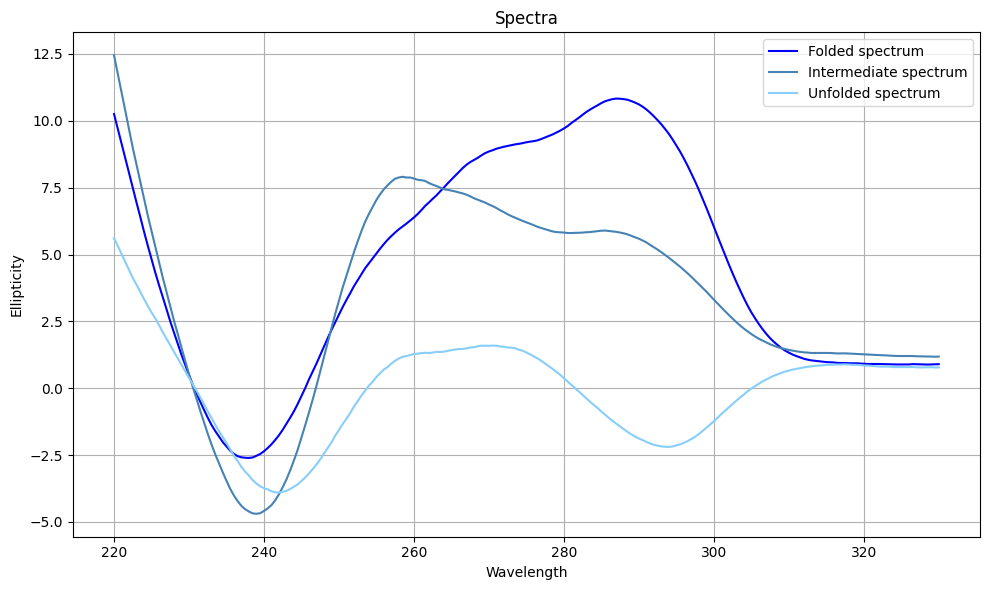

In [5]:
s_f = parametri_dict['C11']*U_prime.iloc[:, 0] + parametri_dict['C12']*U_prime.iloc[:, 1] + parametri_dict['C13']*U_prime.iloc[:, 2]
s_i = parametri_dict['C21']*U_prime.iloc[:, 0] + parametri_dict['C22']*U_prime.iloc[:, 1] + parametri_dict['C23']*U_prime.iloc[:, 2]
s_u = parametri_dict['C31']*U_prime.iloc[:, 0] + parametri_dict['C32']*U_prime.iloc[:, 1] + parametri_dict['C33']*U_prime.iloc[:, 2]

# Creo un array con le lunghezze d'onda da mettere sulle x
#  Al fine di rendere anche grafico successivo sensato fisicamente è necessario inserire sull'asse delle x le T
# e quindi caricare i dati di temperatura
matr = pd.read_csv('matrice_con_t.dat', sep='\t', header=None)
t_array = matr.iloc[0, 1:].astype(float).values # prima riga, salto il primo elemento
l_array = matr.iloc[3:, 0].str.replace(',', '.').astype(float).values


plt.figure(figsize=(10, 6))
plt.plot(l_array, s_f, label='Folded spectrum', color='blue')
plt.plot(l_array, s_i, label='Intermediate spectrum', color='steelblue')
plt.plot(l_array, s_u, label='Unfolded spectrum', color='lightskyblue')

plt.title('Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Ellipticity')
plt.legend()
plt.grid()
plt.tight_layout() 
plt.show()

## Andamenti in funzione della temperatura:

### Popolazione degli stati:

Questa sezione, invece, si concentrerà nello studiare gli andamenti in funzione della temperatura: 

La prima cosa che verrà studiata è M: una matrice di dimensioni (3xlen_T). Questa racchiude informazioni fisiche estremamente interessanti, infatti plottando le 3 componenti di M lungo la temperatura scopriremo le popolazioni corrispettivamente dei 3 stati analizzati: 
folded,
intermediate e
unfolded,
in funzione di T.

Cioè: $M_1 = pop(T)_f$, $M_2 = pop(T)_i$ e $M_3 = pop(T)_u$.

In [6]:
# Carico matrice M
M = pd.read_csv('M_matrix.csv', sep='\t', header=None)
M.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.974479,0.957580,0.930670,0.889218,0.828310,0.744487,0.638665,0.518429,0.396885,0.287514,...,0.000011,0.000007,0.000004,0.000003,0.000002,0.000001,7.195185e-07,4.610821e-07,2.965431e-07,1.914267e-07
1,0.024797,0.040965,0.066469,0.105302,0.161552,0.237578,0.331322,0.434457,0.533958,0.617226,...,0.184111,0.164973,0.147650,0.132026,0.117975,0.105371,9.408853e-02,8.400532e-02,7.500632e-02,6.698333e-02
2,0.000725,0.001455,0.002862,0.005480,0.010139,0.017935,0.030013,0.047114,0.069157,0.095260,...,0.815878,0.835020,0.852345,0.867971,0.882023,0.894627,9.059107e-01,9.159942e-01,9.249934e-01,9.330165e-01


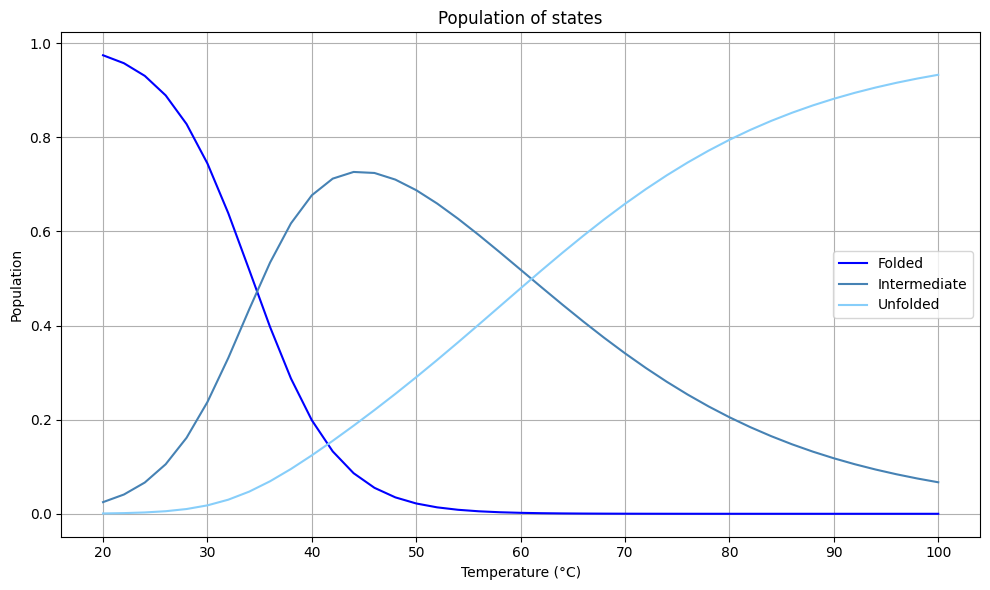

In [7]:
M_1 = M.iloc[0,:].values
M_2 = M.iloc[1,:].values
M_3 = M.iloc[2,:].values

plt.figure(figsize=(10, 6))
plt.plot(t_array, M_1, label='Folded', color='blue')
plt.plot(t_array, M_2, label='Intermediate', color='steelblue')
plt.plot(t_array, M_3, label='Unfolded', color='lightskyblue')

plt.title('Population of states')
plt.xlabel('Temperature (°C)')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Andamento spettri in funzione della T:

Per trattare questa ultima parte è necessario fare delle considerazioni: 
1) Al fine di trattare i vari spettri in funzione della temperatura si è usato: 'ipywidgets';
2) Per confrontare i risultati si sono utilizzati due metodi che teoricamente dovrebbero fornire lo stesso risultato, ovvero l'andamento degli spettri alle varie temperature:
    - Ricostruzione 1: $Spettro_{f,i,u}(\lambda) \times M(T)$
    - Ricostruzione 2: $ U'(\lambda) \times f(T) $

Con $f_i(T) = \sum_{j=1}^{3} C_{ij} \cdot M_j(T)$

**RICOSTRUZIONE 1**


In [8]:
import ipywidgets as widgets
import numpy as np

# Recupera parametri
Tm1 = parametri_dict['Tm1']
Tm2 = parametri_dict['Tm2']
dH1 = parametri_dict['dH1']
dH2 = parametri_dict['dH2']
R = 1.987

# Funzione per calcolare M_i a singola temperatura
def calc_M_i_single(T):
    A = np.exp(-dH1 / R * (1/Tm1 - 1/T))
    B = np.exp(-dH2 / R * (1/Tm2 - 1/T))
    denom = 1 + A + A*B
    M1 = 1 / denom
    M2 = A / denom
    M3 = A*B / denom
    return M1, M2, M3

@widgets.interact(idx=widgets.IntSlider(min=0, max=len(t_array)-1, step=1, value=0))
def plot_spettro_interattivo1(idx):
    T = t_array[idx] +273.15  # Converti in Kelvin
    M1, M2, M3 = calc_M_i_single(T)

    spettro1 = M1 * s_f + M2 * s_i + M3 * s_u

    plt.figure(figsize=(10, 5))
    plt.plot(l_array, spettro1, label=f"T = {t_array[idx]:.1f} °C", color='royalblue')
    plt.xlabel("Lunghezza d’onda (nm)")
    plt.ylabel("Ellitticità")
    plt.title("Spettro simulato in funzione della temperatura")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…

**RICOSTRUZIONE 2**

In [14]:
@widgets.interact(idx=widgets.IntSlider(min=0, max=len(t_array)-1, step=1, value=0))
def plot_spettro_interattivo2(idx):
    T = t_array[idx] + 273.15  # Kelvin
    M1, M2, M3 = calc_M_i_single(T)
    M_vec = np.array([M1, M2, M3])  # shape (3,)

    # Costruzione C
    C = np.array([
        [parametri_dict['C11'], parametri_dict['C12'], parametri_dict['C13']],
        [parametri_dict['C21'], parametri_dict['C22'], parametri_dict['C23']],
        [parametri_dict['C31'], parametri_dict['C32'], parametri_dict['C33']],
    ])

    f_T = C.T @ M_vec  # shape (3,)

    # spettro simulato = combinazione lineare delle componenti SVD (U') con f_T
    spettro2 = U_prime @ f_T  # shape: (n_lambda,)

    plt.figure(figsize=(10, 5))
    plt.plot(l_array, spettro2, label=f"T = {t_array[idx]:.1f} °C", color='sandybrown')
    plt.xlabel("Lunghezza d’onda (nm)")
    plt.ylabel("Ellitticità")
    plt.title("Ricostruzione spettro simulato in funzione della temperatura")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…

plottiamoli insieme:

In [ ]:
# Funzione per calcolare spettro 1
def plot_spettro1(T):
    M1, M2, M3 = calc_M_i_single(T)
    spettro1 = M1 * s_f + M2 * s_i + M3 * s_u
    return spettro1

# Funzione per calcolare spettro 2
def plot_spettro2(T):
    M1, M2, M3 = calc_M_i_single(T)
    M_vec = np.array([M1, M2, M3])  # shape (3,)

    # Costruzione C
    C = np.array([
        [parametri_dict['C11'], parametri_dict['C12'], parametri_dict['C13']],
        [parametri_dict['C21'], parametri_dict['C22'], parametri_dict['C23']],
        [parametri_dict['C31'], parametri_dict['C32'], parametri_dict['C33']],
    ])

    f_T = C.T @ M_vec  # shape (3,)
    
    # spettro simulato = combinazione lineare delle componenti SVD (U') con f_T
    spettro2 = U_prime @ f_T  # shape: (n_lambda,) → perfetta per plot con l_array

    return spettro2

@widgets.interact(idx=widgets.IntSlider(min=0, max=len(t_array)-1, step=1, value=0))
def plot_spettro_combinato(idx):
    T = t_array[idx] + 273.15  # Converti in Kelvin

    # Spettro 1
    spettro1 = plot_spettro1(T)
    
    # Spettro 2
    spettro2 = plot_spettro2(T)

    # Creazione del grafico
    plt.figure(figsize=(10, 6))

    # Plot spettro1
    plt.plot(l_array, spettro1, label=f"Spettro 1 (T = {t_array[idx]:.1f} °C)", color='royalblue')

    # Plot spettro2
    plt.plot(l_array, spettro2, label=f"Spettro 2 (T = {t_array[idx]:.1f} °C)", color='sandybrown')

    plt.xlabel("Lunghezza d’onda (nm)")
    plt.ylabel("Ellitticità")
    plt.title("Confronto tra due spettri simulati in funzione della temperatura")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…